In [1]:
import numpy as np
data = '''
#  nocc  nkpts    homo        lumo         HF        MP2_CORR     CCSD        (T)            AFQMC/HF                AFQMC/CISD                 AFQMC_CCSD_PT   
    7     19    0.01516485  0.090411936 -0.8195259  -0.3978403  -0.156667   -0.006951   -0.976924 +/- 0.000810    -0.981088 +/- 0.000521    -0.981162 +/- 0.00038
    19    57   -0.01669623  0.025185818 -2.1778869  -1.1794744  -0.430291   -0.070134   -2.635135 +/- 0.001161    -2.640527 +/- 0.001422    -2.640931 +/- 0.001211
    27    81   -0.00576861  0.042486236 -3.0823231  -1.1315203  -0.616060   -0.095321   -3.743863 +/- 0.001418    -3.748670 +/- 0.001898    -3.753566 +/- 0.001549
    33    81    0.02482183  0.052500079 -3.4143032  -2.0590057  -0.691452   -0.173553   -4.145148 +/- 0.001337    -4.159375 +/- 0.00315     -4.167867 +/- 0.002065
    57    171  -0.01305398  0.009358976 -5.4005498  -6.0463738  -1.601545   -0.609640   -7.043715 +/- 0.006397    -7.115571 +/- 0.008417    -7.180679 +/- 0.007347
    # 81    251                                                      
    # 93    251   
'''
nocc = []
nkpts = []
homo = []
lumo = []
ehf = []
mp2_corr = []
ccsd_corr = []
ccsd_t = []
afqmc_hf = []
afqmc_hf_err = []
afqmc_ci = []
afqmc_ci_err = []
afqmc_pt = []
afqmc_pt_err = []

for line in data.splitlines():
    if not line.startswith('#') and len(line) > 0:
        parts = line.split()
        if len(parts) == 17:
            nocc = np.hstack((nocc,int(parts[0])))
            nkpts = np.hstack((nkpts,int(parts[1])))
            homo = np.hstack((homo,float(parts[2])))
            lumo = np.hstack((lumo,float(parts[3])))
            ehf = np.hstack((ehf,float(parts[4])))
            mp2_corr = np.hstack((mp2_corr,float(parts[5])))
            ccsd_corr = np.hstack((ccsd_corr,float(parts[6])))
            ccsd_t = np.hstack((ccsd_t,float(parts[7])))
            afqmc_hf = np.hstack((afqmc_hf,float(parts[8])))
            afqmc_hf_err = np.hstack((afqmc_hf_err,float(parts[10])))
            afqmc_ci = np.hstack((afqmc_ci,float(parts[11])))
            afqmc_ci_err = np.hstack((afqmc_ci_err,float(parts[13])))
            afqmc_pt = np.hstack((afqmc_pt,float(parts[14])))
            afqmc_pt_err = np.hstack((afqmc_pt_err,float(parts[16])))

In [2]:
nelec = nocc*2
gap = lumo - homo
inv_gap = 1/gap
ehf_pe = ehf/nelec
mp2_corr_pe = mp2_corr/nelec
emp2_pe = ehf_pe + mp2_corr_pe
ccsd_corr_pe = ccsd_corr/nelec
eccsd_pe = ehf_pe + ccsd_corr_pe
ccsd_t_pe = ccsd_t/nelec
eccsd_t_pe = eccsd_pe + ccsd_t_pe
afqmc_hf_pe = afqmc_hf/nelec
afqmc_hf_err_pe = afqmc_hf_err/nelec
afqmc_ci_pe = afqmc_ci/nelec
afqmc_ci_err_pe = afqmc_ci_err/nelec
afqmc_pt_pe = afqmc_pt/nelec
afqmc_pt_err_pe = afqmc_pt_err/nelec

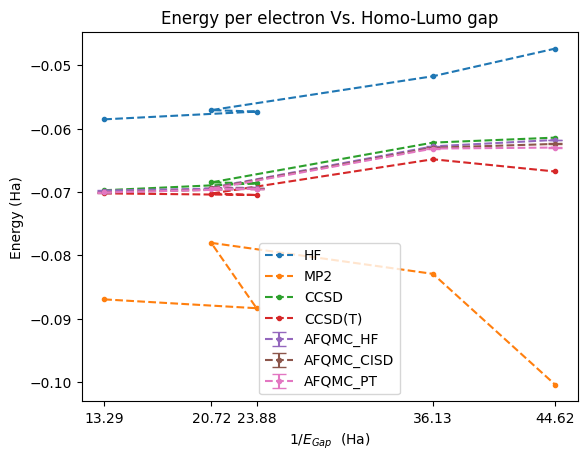

In [3]:
from matplotlib import pyplot as plt
plt.plot(inv_gap,ehf_pe,'.--',color='C0',label='HF')
plt.plot(inv_gap,emp2_pe,'.--',color='C1',label='MP2')
plt.plot(inv_gap,eccsd_pe,'.--',color='C2',label='CCSD')
plt.plot(inv_gap,eccsd_t_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(inv_gap,afqmc_hf_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(inv_gap,afqmc_ci_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(inv_gap,afqmc_pt_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(inv_gap)
plt.xlabel('1/$E_{Gap}$  (Ha)')
plt.ylabel('Energy (Ha)')
plt.title('Energy per electron Vs. Homo-Lumo gap')
plt.legend()
plt.show()

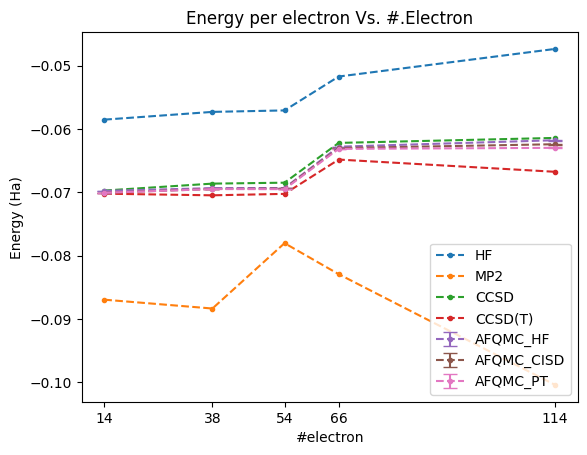

In [4]:
from matplotlib import pyplot as plt
plt.plot(nelec,ehf_pe,'.--',color='C0',label='HF')
plt.plot(nelec,emp2_pe,'.--',color='C1',label='MP2')
plt.plot(nelec,eccsd_pe,'.--',color='C2',label='CCSD')
plt.plot(nelec,eccsd_t_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Energy per electron Vs. #.Electron')
plt.legend()
plt.show()

In [ ]:
idx = np.argsort(inv_gap)

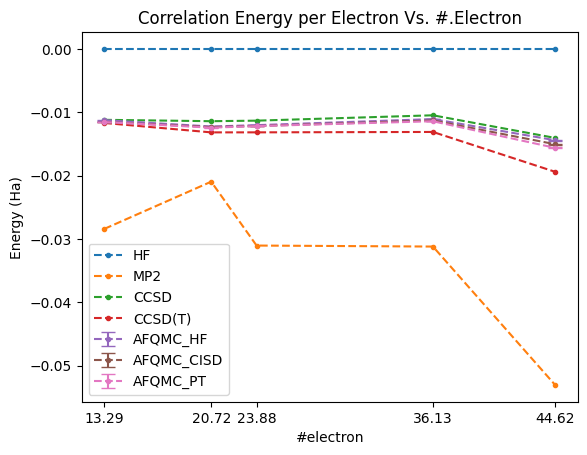

In [11]:
from matplotlib import pyplot as plt
idx = np.argsort(inv_gap)
plt.plot(inv_gap[idx],ehf_pe[idx]-ehf_pe[idx],'.--',color='C0',label='HF')
plt.plot(inv_gap[idx],emp2_pe[idx]-ehf_pe[idx],'.--',color='C1',label='MP2')
plt.plot(inv_gap[idx],eccsd_pe[idx]-ehf_pe[idx],'.--',color='C2',label='CCSD')
plt.plot(inv_gap[idx],eccsd_t_pe[idx]-ehf_pe[idx],'.--',color='C3',label='CCSD(T)')
plt.errorbar(inv_gap[idx],afqmc_hf_pe[idx]-ehf_pe[idx],yerr=afqmc_hf_err_pe[idx],fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(inv_gap[idx],afqmc_ci_pe[idx]-ehf_pe[idx],yerr=afqmc_ci_err_pe[idx],fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(inv_gap[idx],afqmc_pt_pe[idx]-ehf_pe[idx],yerr=afqmc_pt_err_pe[idx],fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(inv_gap[idx])
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Correlation Energy per Electron Vs. #.Electron')
plt.legend()
plt.show()

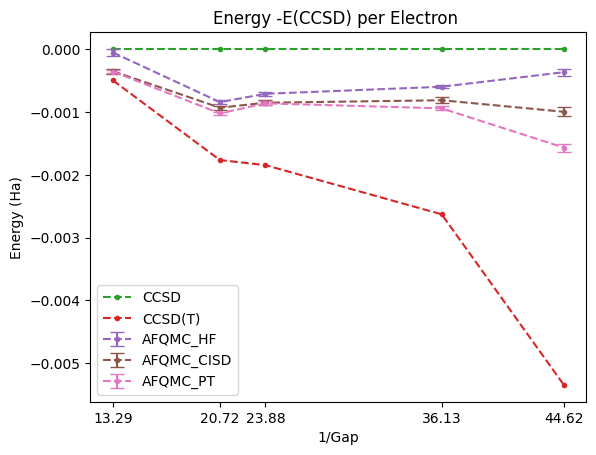

In [12]:
plt.plot(inv_gap[idx],eccsd_pe[idx]-eccsd_pe[idx],'.--',color='C2',label='CCSD')
plt.plot(inv_gap[idx],eccsd_t_pe[idx]-eccsd_pe[idx],'.--',color='C3',label='CCSD(T)')
plt.errorbar(inv_gap[idx],afqmc_hf_pe[idx]-eccsd_pe[idx],yerr=afqmc_hf_err_pe[idx],fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(inv_gap[idx],afqmc_ci_pe[idx]-eccsd_pe[idx],yerr=afqmc_ci_err_pe[idx],fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(inv_gap[idx],afqmc_pt_pe[idx]-eccsd_pe[idx],yerr=afqmc_pt_err_pe[idx],fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(inv_gap[idx])
plt.xlabel('1/Gap')
plt.ylabel('Energy (Ha)')
plt.title('Energy -E(CCSD) per Electron ')
plt.legend()
plt.show()

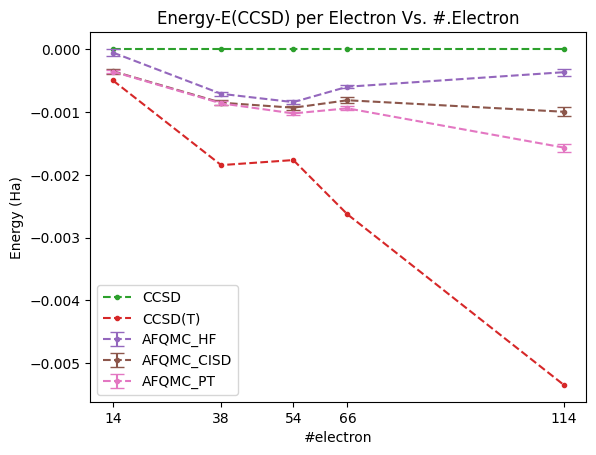

In [6]:
from matplotlib import pyplot as plt
# plt.plot(nelec,ehf_pe-ehf_pe,'.--',color='C0',label='HF')
# plt.plot(nelec,emp2_pe-ehf_pe,'.--',color='C1',label='MP2')
plt.plot(nelec,eccsd_pe-eccsd_pe,'.--',color='C2',label='CCSD')
plt.plot(nelec,eccsd_t_pe-eccsd_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe-eccsd_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe-eccsd_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe-eccsd_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Energy-E(CCSD) per Electron Vs. #.Electron')
plt.legend()
plt.show()

In [ ]:
plt.plot(nelec,eccsd_pe-eccsd_pe,'.--',color='C2',label='CCSD')
plt.plot(nelec,eccsd_t_pe-eccsd_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe-eccsd_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe-eccsd_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe-eccsd_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Energy-E(CCSD) per Electron Vs. #.Electron')
plt.legend()
plt.show()

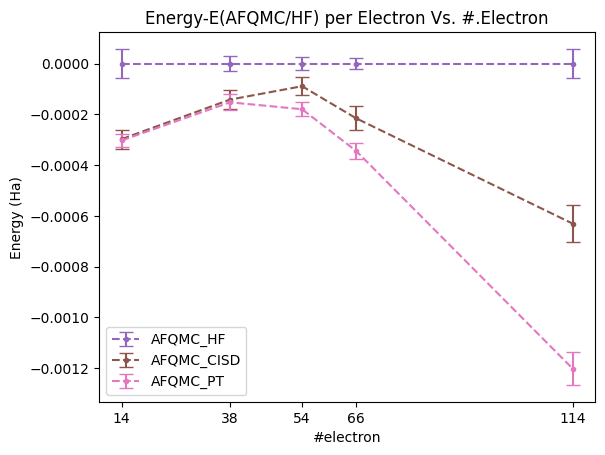

In [7]:
from matplotlib import pyplot as plt
# plt.plot(nelec,ehf_pe-ehf_pe,'.--',color='C0',label='HF')
# plt.plot(nelec,emp2_pe-ehf_pe,'.--',color='C1',label='MP2')
# plt.plot(nelec,eccsd_pe-eccsd_pe,'.--',color='C2',label='CCSD')
# plt.plot(nelec,eccsd_t_pe-eccsd_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe-afqmc_hf_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe-afqmc_hf_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe-afqmc_hf_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Energy-E(AFQMC/HF) per Electron Vs. #.Electron')
plt.legend()
plt.show()